# Assignment 6
## Akarsh Sahu
### 11-6-2019

In [21]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import RandomForestClassifier

## 1. Data Processing:

#### a. Import the data: You are provided separate .csv files for train and test.

1. Train shape: (507, 148)
2. Test shape: (168, 148)

In [4]:
train = pd.read_csv('train_data.csv')
test = pd.read_csv('test_data.csv')

print(train.shape)
print(test.shape)

(507, 148)
(168, 148)


#### b. Remove any rows that have missing data across both sets of data.

In [9]:
train.isnull().sum()
train = train.dropna(how='any',axis=0) 

In [8]:
test.isnull().sum()
test = test.dropna(how='any',axis=0) 

#### c. The target variable (dependent variable) is called "class", make sure to separate this out into a "y_train" and "y_test" and remove from your "X_train" and "X_test". 

In [16]:
y_train = train[['class']]
X_train = train.drop(['class'], axis = 1)

y_test = test[['class']]
X_test = test.drop(['class'], axis = 1)

#### d) Scale all features / predictors (NOT THE TARGET VARIABLE)

In [27]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_t = scaler.transform(X_train)
X_test_t = scaler.transform(X_test)

AttributeError: 'numpy.ndarray' object has no attribute 'to_numpy'

## 2. Random Forest Classifier - Base Model:

#### a. Use the RandomForestClassifier in sklearn. Fit your model on the training data.

In [24]:
mdl1_rf = RandomForestClassifier(n_estimators=100, max_depth=4, random_state=0)
mdl1_rf.fit(X_train_t, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

#### b. Use the fitted model to predict on test data. Use the .predict() method to get the predicted classes.

In [25]:
mdl1_pred = mdl1_rf.predict(X_test_t)

#### c. Calculate the confusion matrix and classification report for the test data. 

In [28]:
# import the metrics class
from sklearn import metrics

#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, mdl1_pred)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_test, mdl1_pred)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[14  0  0  0  0  0  0  0  0]
 [ 1 21  0  2  1  0  0  0  0]
 [ 1  3 10  1  0  0  0  0  0]
 [ 0  4  0 19  0  0  0  0  0]
 [ 0  0  0  0 24  0  0  0  5]
 [ 1  1  1  0  0 12  0  0  0]
 [ 3  0  0  0  0  0 13  0  0]
 [ 0  1  0 10  3  0  0  0  0]
 [ 0  0  0  1  1  0  0  0 15]]



Classification Report

               precision    recall  f1-score   support

    asphalt        0.70      1.00      0.82        14
   building        0.70      0.84      0.76        25
        car        0.91      0.67      0.77        15
   concrete        0.58      0.83      0.68        23
      grass        0.83      0.83      0.83        29
       pool        1.00      0.80      0.89        15
     shadow        1.00      0.81      0.90        16
       soil        0.00      0.00      0.00        14
       tree        0.75      0.88      0.81        17

   micro avg       0.76      0.76      0.76       168
   macro avg       0.72      0.74      0.72       168
weighted avg       0.73      0.76

#### d.  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [29]:
mdl1_pred_tr = mdl1_rf.predict(X_train_t)

In [30]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_train, mdl1_pred_tr)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_train, mdl1_pred_tr)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[43  0  0  0  1  0  1  0  0]
 [ 2 87  1  7  0  0  0  0  0]
 [ 0  0 20  1  0  0  0  0  0]
 [ 0  4  0 88  0  0  0  0  1]
 [ 0  1  0  0 76  0  0  0  6]
 [ 0  1  0  0  1 12  0  0  0]
 [ 2  0  0  0  0  0 42  0  1]
 [ 0  3  0  5  1  0  0 11  0]
 [ 1  0  0  0  5  0  1  0 82]]



Classification Report

               precision    recall  f1-score   support

    asphalt        0.90      0.96      0.92        45
   building        0.91      0.90      0.90        97
        car        0.95      0.95      0.95        21
   concrete        0.87      0.95      0.91        93
      grass        0.90      0.92      0.91        83
       pool        1.00      0.86      0.92        14
     shadow        0.95      0.93      0.94        45
       soil        1.00      0.55      0.71        20
       tree        0.91      0.92      0.92        89

   micro avg       0.91      0.91      0.91       507
   macro avg       0.93      0.88      0.90       507
weighted avg       0.91      0.91

##### There are clear signs of overfitting as the metrics(precision, recall, f1-score, accuracy) for the training dataset are significantly higher as compared to the test dataset.

#### e. Identify the top 5 features. Feel free to print a list OR to make a plot. 

None


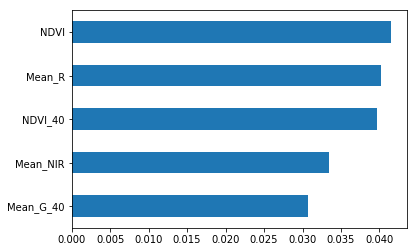

In [34]:
feat_importances = pd.Series(mdl1_rf.feature_importances_, index=X_train.columns)
plt = feat_importances.nlargest(5).plot(kind='barh')
print(plt.invert_yaxis())

## 3. LinearSVM Classifier - Base Model:

#### Create a simple LinearSVC Classifier only using default parameters.

#### a. Use the LinearSVC in sklearn. Fit your model on the training data.

In [35]:
from sklearn.svm import LinearSVC

mdl2_lsvc = LinearSVC()
mdl2_lsvc.fit(X_train_t, y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

#### b. Use the fitted model to predict on test data. Use the .predict() method to get the predicted classes.

In [36]:
mdl2_pred = mdl2_lsvc.predict(X_test_t)

#### c. Calculate the confusion matrix and classification report for test data.

In [37]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, mdl2_pred)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_test, mdl2_pred)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[13  0  0  0  0  0  1  0  0]
 [ 0 22  1  1  1  0  0  0  0]
 [ 0  2 12  0  0  0  0  0  1]
 [ 1  6  0 15  0  0  0  0  1]
 [ 0  0  0  1 26  0  0  0  2]
 [ 1  0  1  0  0 13  0  0  0]
 [ 2  0  0  0  0  0 14  0  0]
 [ 0  4  0  1  3  0  0  6  0]
 [ 0  0  0  1  7  0  0  0  9]]



Classification Report

               precision    recall  f1-score   support

    asphalt        0.76      0.93      0.84        14
   building        0.65      0.88      0.75        25
        car        0.86      0.80      0.83        15
   concrete        0.79      0.65      0.71        23
      grass        0.70      0.90      0.79        29
       pool        1.00      0.87      0.93        15
     shadow        0.93      0.88      0.90        16
       soil        1.00      0.43      0.60        14
       tree        0.69      0.53      0.60        17

   micro avg       0.77      0.77      0.77       168
   macro avg       0.82      0.76      0.77       168
weighted avg       0.80      0.77

#### d.  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [39]:
mdl2_pred_tr = mdl2_lsvc.predict(X_train_t)

In [40]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_train, mdl2_pred_tr)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_train, mdl2_pred_tr)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[45  0  0  0  0  0  0  0  0]
 [ 0 97  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0]
 [ 0  0  0 93  0  0  0  0  0]
 [ 0  1  0  0 80  0  0  0  2]
 [ 0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0 45  0  0]
 [ 0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0 89]]



Classification Report

               precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        0.99      1.00      0.99        97
        car        1.00      1.00      1.00        21
   concrete        1.00      1.00      1.00        93
      grass        1.00      0.96      0.98        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      1.00      1.00        20
       tree        0.98      1.00      0.99        89

   micro avg       0.99      0.99      0.99       507
   macro avg       1.00      1.00      1.00       507
weighted avg       0.99      0.99

##### There are clear signs of overfitting as the metrics(precision, recall, f1-score, accuracy) for the training dataset are significantly higher as compared to the test dataset.

## 4. Support Vector Machine Classifier + Linear Kernel + Grid Search:

#### a) Use SVC from sklearn with kernel = "linear". Run the GridSearchCV using the following (SVMs run much faster than RandomForest):

C: 0.01 - 10 in increments of 0.2 (consider using the np.arange() method from numpy to build out a sequence of values)

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and the default scoring. Please set verbose = 0 to reduce the printing (sorry to our grader for not specifying this last week!).

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

sv_obj = SVC(kernel = 'linear')

param_grid = {'C': np.arange(0.01, 10, 0.2).tolist()}

svc_Grid = GridSearchCV(sv_obj, param_grid, cv=5, verbose=0)

In [55]:
svc_Grid.fit(X_train_t, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.21000000000000002, 0.41000000000000003, 0.6100000000000001, 0.81, 1.01, 1.2100000000000002, 1.4100000000000001, 1.61, 1.81, 2.01, 2.21, 2.41, 2.61, 2.81, 3.01, 3.21, 3.41, 3.61, 3.81, 4.01, 4.21, 4.41, 4.61, 4.8100000000000005, 5.01, 5.21, 5.41, 5.61, 5.8100000000000005, 6.01, 6.21, 6.41, 6.61, 6.8100000000000005, 7.01, 7.21, 7.41, 7.61, 7.8100000000000005, 8.01, 8.21, 8.41, 8.61, 8.81, 9.01, 9.21, 9.41, 9.610000000000001, 9.81]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### b. Identify the best performing model:

1. .best_params_() : This method outputs to best performing parameters
2. .best_estimator_() : This method outputs the best performing model, and can be used for predicting on the X_test

In [57]:
svc_Grid.best_params_

{'C': 0.01}

In [58]:
mdl3_svc = svc_Grid.best_estimator_

In [84]:
mdl3_svc

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

#### c. Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.

In [60]:
mdl3_pred = mdl3_svc.predict(X_test_t)

#### d. Calculate the confusion matrix and classification report for test data.

In [61]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, mdl3_pred)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_test, mdl3_pred)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[13  0  0  0  0  0  1  0  0]
 [ 0 22  0  2  1  0  0  0  0]
 [ 0  1 14  0  0  0  0  0  0]
 [ 0  5  0 17  0  0  0  1  0]
 [ 0  0  0  1 25  0  0  0  3]
 [ 0  0  0  0  0 14  1  0  0]
 [ 1  0  0  0  0  0 15  0  0]
 [ 0  3  0  5  2  0  0  4  0]
 [ 0  0  0  1  2  0  0  0 14]]



Classification Report

               precision    recall  f1-score   support

    asphalt        0.93      0.93      0.93        14
   building        0.71      0.88      0.79        25
        car        1.00      0.93      0.97        15
   concrete        0.65      0.74      0.69        23
      grass        0.83      0.86      0.85        29
       pool        1.00      0.93      0.97        15
     shadow        0.88      0.94      0.91        16
       soil        0.80      0.29      0.42        14
       tree        0.82      0.82      0.82        17

   micro avg       0.82      0.82      0.82       168
   macro avg       0.85      0.81      0.82       168
weighted avg       0.83      0.82

#### e.  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [62]:
mdl3_pred_tr = mdl3_svc.predict(X_train_t)

In [63]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_train, mdl3_pred_tr)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_train, mdl3_pred_tr)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[40  0  0  0  0  0  5  0  0]
 [ 2 87  0  7  0  0  1  0  0]
 [ 0  1 19  1  0  0  0  0  0]
 [ 0  9  0 83  1  0  0  0  0]
 [ 0  1  0  0 70  0  0  0 12]
 [ 0  1  0  0  1 12  0  0  0]
 [ 1  0  0  0  0  0 43  0  1]
 [ 0  3  0  4  2  0  0 11  0]
 [ 0  0  0  0  3  0  1  0 85]]



Classification Report

               precision    recall  f1-score   support

    asphalt        0.93      0.89      0.91        45
   building        0.85      0.90      0.87        97
        car        1.00      0.90      0.95        21
   concrete        0.87      0.89      0.88        93
      grass        0.91      0.84      0.88        83
       pool        1.00      0.86      0.92        14
     shadow        0.86      0.96      0.91        45
       soil        1.00      0.55      0.71        20
       tree        0.87      0.96      0.91        89

   micro avg       0.89      0.89      0.89       507
   macro avg       0.92      0.86      0.88       507
weighted avg       0.89      0.89

##### There are no signs of overfitting as the metrics(precision, recall, f1-score, accuracy) for the training dataset are comparable to that of test dataset.

## 5. Support Vector Machine Classifier + Polynomial Kernel + Grid Search:

#### a) Use SVC from sklearn with kernel = "poly". Run the GridSearchCV using the following:

1. C: 0.01 - 10 in increments of 0.2
2. degree: 2, 3, 4, 5, 6

In [64]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

sv_obj = SVC(kernel = 'poly')

param_grid = {'C': np.arange(0.01, 10, 0.2).tolist(),
             'degree': [2,3,4,5,6]}

svc_Grid = GridSearchCV(sv_obj, param_grid, cv=5, verbose=0)

In [65]:
svc_Grid.fit(X_train_t, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='poly', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.21000000000000002, 0.41000000000000003, 0.6100000000000001, 0.81, 1.01, 1.2100000000000002, 1.4100000000000001, 1.61, 1.81, 2.01, 2.21, 2.41, 2.61, 2.81, 3.01, 3.21, 3.41, 3.61, 3.81, 4.01, 4.21, 4.41, 4.61, 4.8100000000000005, 5.01, 5.21, 5.41, 5.61, 5.8100000000000005, 6.01, 6.21, 6.41, 6.61, 6.8100000000000005, 7.01, 7.21, 7.41, 7.61, 7.8100000000000005, 8.01, 8.21, 8.41, 8.61, 8.81, 9.01, 9.21, 9.41, 9.610000000000001, 9.81], 'degree': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### b. Identify the best performing model:

1. .best_params_() : This method outputs to best performing parameters
2. .best_estimator_() : This method outputs the best performing model, and can be used for predicting on the X_test

In [66]:
svc_Grid.best_params_

{'C': 8.41, 'degree': 3}

In [85]:
mdl4_svc = svc_Grid.best_estimator_
mdl4_svc

SVC(C=4.21, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### c. Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.

In [68]:
mdl4_pred = mdl4_svc.predict(X_test_t)

#### d. Calculate the confusion matrix and classification report for test data.

In [78]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, mdl4_pred)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_test, mdl4_pred)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[13  0  0  0  0  0  1  0  0]
 [ 0 22  0  2  1  0  0  0  0]
 [ 0  2 11  0  0  1  0  1  0]
 [ 0  5  0 17  0  0  0  1  0]
 [ 0  0  0  0 26  0  0  1  2]
 [ 0  0  0  0  0 14  1  0  0]
 [ 2  0  0  0  0  0 14  0  0]
 [ 0  3  0  4  6  0  0  1  0]
 [ 0  0  0  1  3  0  0  0 13]]



Classification Report

               precision    recall  f1-score   support

    asphalt        0.87      0.93      0.90        14
   building        0.69      0.88      0.77        25
        car        1.00      0.73      0.85        15
   concrete        0.71      0.74      0.72        23
      grass        0.72      0.90      0.80        29
       pool        0.93      0.93      0.93        15
     shadow        0.88      0.88      0.88        16
       soil        0.25      0.07      0.11        14
       tree        0.87      0.76      0.81        17

   micro avg       0.78      0.78      0.78       168
   macro avg       0.77      0.76      0.75       168
weighted avg       0.76      0.78

#### e.  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [70]:
mdl4_pred_tr = mdl4_svc.predict(X_train_t)

In [71]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_train, mdl4_pred_tr)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_train, mdl4_pred_tr)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[45  0  0  0  0  0  0  0  0]
 [ 0 97  0  0  0  0  0  0  0]
 [ 0  0 20  0  1  0  0  0  0]
 [ 0  1  0 91  1  0  0  0  0]
 [ 0  1  0  0 82  0  0  0  0]
 [ 0  0  0  0  1 13  0  0  0]
 [ 0  0  0  0  0  0 45  0  0]
 [ 0  0  0  0  5  0  0 15  0]
 [ 0  0  0  0  1  0  0  0 88]]



Classification Report

               precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        0.98      1.00      0.99        97
        car        1.00      0.95      0.98        21
   concrete        1.00      0.98      0.99        93
      grass        0.90      0.99      0.94        83
       pool        1.00      0.93      0.96        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      0.75      0.86        20
       tree        1.00      0.99      0.99        89

   micro avg       0.98      0.98      0.98       507
   macro avg       0.99      0.95      0.97       507
weighted avg       0.98      0.98

##### There are clear signs of overfitting as the metrics(precision, recall, f1-score, accuracy) for the training dataset are significantly higher as compared to the test dataset.

## 6. Support Vector Machine Classifier + RBF Kernel + Grid Search:

#### a. Use SVC from sklearn with kernel = "rbf". Run the GridSearchCV using the following:

1. C: 0.01 - 10 in increments of 0.2
2. gamma: 0.01,  0.1, 1, 10, 100

In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

sv_obj = SVC(kernel = 'rbf')

param_grid = {'C': np.arange(0.01, 10, 0.2).tolist(),
             'gamma': [0.01, 0.1, 1, 10, 100]}

svc_Grid = GridSearchCV(sv_obj, param_grid, cv=5, verbose=0)

In [74]:
svc_Grid.fit(X_train_t, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.01, 0.21000000000000002, 0.41000000000000003, 0.6100000000000001, 0.81, 1.01, 1.2100000000000002, 1.4100000000000001, 1.61, 1.81, 2.01, 2.21, 2.41, 2.61, 2.81, 3.01, 3.21, 3.41, 3.61, 3.81, 4.01, 4.21, 4.41, 4.61, 4.8100000000000005, 5.01, 5.21, 5.41, 5.61, 5.8100000000000005, 6.01, 6.21, 6.41, 6.61, 6.8100000000000005, 7.01, 7.21, 7.41, 7.61, 7.8100000000000005, 8.01, 8.21, 8.41, 8.61, 8.81, 9.01, 9.21, 9.41, 9.610000000000001, 9.81], 'gamma': [0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

#### b. Identify the best performing model:

1. .best_params_() : This method outputs to best performing parameters
2. .best_estimator_() : This method outputs the best performing model, and can be used for predicting on the X_test

In [75]:
svc_Grid.best_params_

{'C': 4.21, 'gamma': 0.01}

In [86]:
mdl5_svc = svc_Grid.best_estimator_
mdl5_svc


SVC(C=4.21, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

#### c. Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.

In [77]:
mdl5_pred = mdl5_svc.predict(X_test_t)

#### d. Calculate the confusion matrix and classification report for test data.

In [80]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_test, mdl5_pred)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_test, mdl5_pred)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[13  0  0  0  0  0  1  0  0]
 [ 0 21  0  3  1  0  0  0  0]
 [ 0  1 13  1  0  0  0  0  0]
 [ 0  4  0 19  0  0  0  0  0]
 [ 0  1  0  0 26  0  0  0  2]
 [ 0  0  0  0  0 14  1  0  0]
 [ 1  0  0  0  0  0 15  0  0]
 [ 0  2  0  4  3  0  0  5  0]
 [ 0  0  0  1  1  0  0  0 15]]



Classification Report

               precision    recall  f1-score   support

    asphalt        0.93      0.93      0.93        14
   building        0.72      0.84      0.78        25
        car        1.00      0.87      0.93        15
   concrete        0.68      0.83      0.75        23
      grass        0.84      0.90      0.87        29
       pool        1.00      0.93      0.97        15
     shadow        0.88      0.94      0.91        16
       soil        1.00      0.36      0.53        14
       tree        0.88      0.88      0.88        17

   micro avg       0.84      0.84      0.84       168
   macro avg       0.88      0.83      0.84       168
weighted avg       0.86      0.84

#### e.  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [82]:
mdl5_pred_tr = mdl5_svc.predict(X_train_t)

In [83]:
#Confusion Matrix
cnf_matrix = metrics.confusion_matrix(y_train, mdl5_pred_tr)
print("Confusion Matrix\n\n", cnf_matrix)

print("\n\n")
#Classification Report
cl_report = metrics.classification_report(y_train, mdl5_pred_tr)
print("Classification Report\n\n", cl_report)

Confusion Matrix

 [[45  0  0  0  0  0  0  0  0]
 [ 0 97  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0]
 [ 0  1  0 92  0  0  0  0  0]
 [ 0  1  0  0 82  0  0  0  0]
 [ 0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0 45  0  0]
 [ 0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  1  0  0  0 88]]



Classification Report

               precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        0.98      1.00      0.99        97
        car        1.00      1.00      1.00        21
   concrete        1.00      0.99      0.99        93
      grass        0.99      0.99      0.99        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      1.00      1.00        20
       tree        1.00      0.99      0.99        89

   micro avg       0.99      0.99      0.99       507
   macro avg       1.00      1.00      1.00       507
weighted avg       0.99      0.99

##### Yes, similar to the model above there are signs of overfitting. The classification report for train data has significantly higher numbers compared to the ones from the test data. For example, the accuracy is a lot higher for train than test (0.99 vs 0.83), and similar story for precision, recall and f1-scores.

## 7. Conceptual Questions:

#### a) From the models run in steps 2-6, which performs the best based on the Classification Report? Support your reasoning with evidence around your test data.

By looking at the scores from the classification reports, model 2, 3, 5 and 6 had extremely good scores. For example, the accuracy scores for Support Vector Machine Classifier + RBF Kernel had 0.83 for test and 0.99 for train. But if we define the performance of a model based on how well the model generalizes, model 4 (Support Vector Machine Classifier + Linear Kernel + Grid Search) performed the best because even though there were some signs of overfitting, they were not as bad compared to other models. i.e. The classification report for train data slightly higher numbers compared to the ones from the test data. For example, the accuracy is a little higher for train than test (0.89 vs 0.81), and mostly similar story for precision, recall and f1-scores (values were not significantly different). The model did a pretty good job generalizing.

#### b) Compare models run for steps 4-6 where different kernels were used. What is the benefit of using a polynomial or rbf kernel over a linear kernel? What could be a downside of using a polynomial or rbf kernel?

Model 4 - SVM + Linear Kernel

- Best parameters: SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)
- Accuracy for test: 0.81
- Accuracy for train: 0.89
- Some signs of overfitting, but not as bad as the default LinearSVM Classifier from Step 3

Model 5 - SVM + Polynomial Kernel

- Best parameters: SVC(C=4.21, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
- Accuracy for test: 0.76
- Accuracy for train: 0.98
- Obvious signs of overfitting

Model 6 - SVM + RBF Kernel

- Best parameters: SVC(C=4.21, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
- Accuracy for test: 0.83
- Accuracy for train: 0.99
- Obvious signs of overfitting

The linear, polynomial and RBF or Gaussian kernel are different approaches to making the hyperplane decision boundary between the classes where the kernel functions are used to map the original dataset (linear/nonlinear ) into a higher dimensional space with view to making it linear dataset. Although linear SVM classifiers are efficient and work surprisingly well in many cases, many datasets are not even close to being linearly separable. One approach to handling nonlinear datasets is to add more features, such as polynomial features. Usually linear and polynomial kernels are less time consuming and provides less accuracy than the rbf or Gaussian kernels.

Adding polynomial features is simple to implement and can work great with all sorts of Machine Learning algorithms, but at a low polynomial degree it cannot deal with very complex datasets, and with a high polynomial degree it creates a huge number of features, making the model too slow. Fortunately, when using SVMs we can apply a mathematical technique called the kernel trick where there is no combinatorial explosion of the number of features since you don’t actually add any features.

As for RBF, just like the polynomial features method, the similarity features method can be useful with any Machine Learning algorithm, but it may be computationally expensive to compute all the additional features, especially on large training sets. However, once again we can use kernel trick where it makes it possible to obtain a similar result as if we had added many similarity features, without actually having to add them.

To summarize, Linear SVM is a parametric model, an RBF kernel SVM isn't, and the complexity of the latter grows with the size of the training set. Not only is it more expensive to train an RBF kernel SVM, but you also have to keep the kernel matrix around, and the projection into this "infinite" higher dimensional space where the data becomes linearly separable is more expensive as well during prediction. Furthermore, you have more hyperparameters to tune, so model selection is more expensive as well. And finally, it's much easier to overfit a complex model.

#### c) Explain the 'C' parameter used in steps 4-6. What does a small C mean versus a large C in sklearn? Why is it important to use the 'C' parameter when fitting a model?

Generally in a SVM we are searching for two things: a hyperplane with the largest minimum margin, and a hyperplane that correctly separates as many instances as possible. The problem is that we will not always be able to get both things. The c parameter determines how great our desire is for the latter.

The C parameter (essentially a regularisation parameter, which controls the trade-off between achieving a low error on the training data and minimizing the norm of the weights.) tells the SVM optimization how much you want to avoid misclassifying each training example. For large values of C, the classifier makes fewer margin violations but ends up with a smaller margin basically the model will choose a smaller-margin hyperplane if that hyperplane does a better job of getting all the training points classified correctly. Conversely, a very small value of C leads to a wider boundaries but more margin violations basically it will cause the optimizer to look for a larger-margin separating hyperplane, even if that hyperplane misclassifies more points. For very tiny values of C, you should get misclassified examples, often even if your training data is linearly separable.

#### d) Scaling our input data does not matter much for Random Forest, but it is a critical step for Support Vector Machines. Explain why this is such a critical step. Also, provide an example of a feature from this data set that could cause issues with our SVMs if not scaled.

Main purpose of scaling data before processing is to avoid attributes in greater numeric ranges. Other purpose is to avoid some types of numerical difficulties during calculation. Large attribute values might cause numerical problems. Scaling is very important in case of variables with large variances. To put it differently, SVM tries to maximize the distance between the separating plane and the support vectors. If one feature has very large values, it will dominate the other features when calculating the distance. So overall, scaling will help SVM's performance to improve.

In [88]:
train.describe()

,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,SD_G,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
count,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,...,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000,507.000000
mean,2.025720,562.504931,1.237574,165.612939,2.187081,2.277318,166.290355,162.291953,168.256667,10.725227,...,24.601144,2.931657,0.817712,0.597732,8.048698,1.455838,0.653905,0.027436,1398.706114,1101.998185
std,0.619254,698.655240,0.561988,63.230806,0.874054,0.718441,59.217648,73.455101,69.702475,4.968761,...,12.203441,4.942887,0.106007,0.197505,0.787912,0.451781,0.251287,0.133834,1097.323462,533.927869
min,1.000000,22.000000,0.000000,26.850000,1.000000,1.040000,22.910000,26.520000,31.110000,3.550000,...,2.650000,1.000000,0.200000,0.100000,5.690000,0.240000,0.030000,-0.360000,34.000000,211.270000
25%,1.580000,159.000000,0.840000,127.485000,1.650000,1.715000,146.460000,97.585000,111.715000,6.985000,...,14.485000,1.375000,0.770000,0.455000,7.370000,1.160000,0.470000,-0.080000,601.000000,726.745000
50%,1.950000,323.000000,1.210000,170.650000,2.000000,2.180000,189.630000,158.280000,167.750000,9.290000,...,22.380000,1.920000,0.840000,0.610000,8.020000,1.440000,0.710000,-0.020000,1148.000000,1011.230000
75%,2.380000,681.500000,1.565000,224.825000,2.490000,2.675000,206.780000,237.375000,238.480000,13.330000,...,33.825000,2.800000,0.890000,0.760000,8.750000,1.775000,0.860000,0.145000,1874.000000,1335.640000
max,4.530000,5767.000000,3.520000,245.870000,8.070000,5.410000,239.370000,253.610000,253.630000,30.870000,...,61.340000,64.700000,0.970000,1.000000,9.570000,2.410000,1.000000,0.370000,8896.000000,3619.280000


One example would be "BordLngth_140", with the mean of 1398.71 and std of 1097.32. The values and range for "BordLngth_140" is very different from some features such as "BrdIndx", with the mean of 2.03 and std of 0.62.

#### e) Describe conceptually what the purpose of a kernel is for Support Vector Machines.

In machine learning, a “kernel” is usually used to refer to the kernel trick, a method of using a linear classifier to solve a non-linear problem. It entails transforming linearly inseparable data like to linearly separable ones. The kernel function is what is applied on each data instance to map the original non-linear observations into a higher-dimensional space in which they become separable. For exmaple, SVM algorithms use a set of mathematical functions that are defined as the kernel. The function of kernel is to take data as input and transform it into the required form. Different SVM algorithms use different types of kernel functions. These functions can be different types i.e. linear, nonlinear, polynomial, radial basis function (RBF), and sigmoid. To summarize, if we want transform our existing data into a higher dimensional data, which in many cases help us classify better we need not compute the exact transformation of our data, we just need the inner product of our data in that higher dimensional space. This works in datasets which aren’t linearly separable.